# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
df_raw.describe()

/Applications/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of GRE (220-800) is larger than GPA (2.26-4.0), so the standard deviation can be larger. 

#### Question 4. Drop data points with missing data


In [5]:
df_no_missing = df_raw.dropna()
df_no_missing

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [6]:
df_no_missing.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: All counts are now 397.

#### Question 6. Create box plots for GRE and GPA

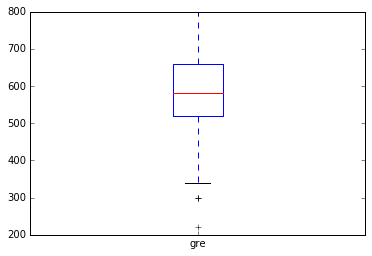

In [7]:
df_no_missing[['gre']].plot(kind='box');

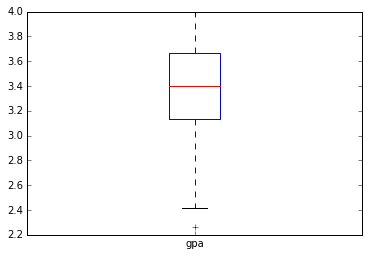

In [8]:
df_no_missing[['gpa']].plot(kind='box');

#### Question 7. What do this plots show?

Answer: Interquartile range for GRE and GPA and any outliers.

#### Question 8. Describe each distribution 

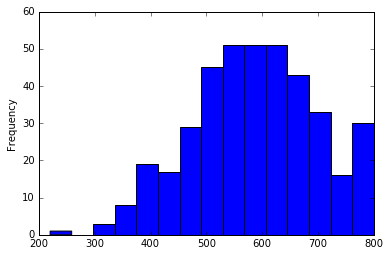

In [17]:
df_no_missing.gre.plot(kind='hist', bins=15)

GRE follows a roughly normal distribution.

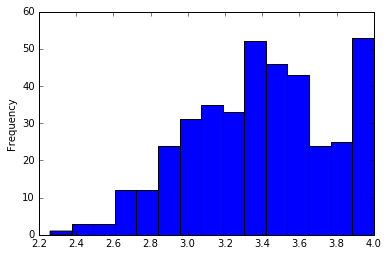

In [18]:
df_no_missing.gpa.plot(kind='hist', bins=15)

GPA has a negatively skewed distribution.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: For GRE yes, for GPA no.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Skewed distributions need to be corrected if your model assumes a normal distribution. Two possibilities are to log-transform the data or to normalize it.

#### Question 11. Which of our variables are potentially colinear? 

In [19]:
df_no_missing.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA are closest to being colinear (closest to 1).

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Examine the data by summarizing it in a table using the describe command. Decide what to do if any row has missing data, clean if necessary. Examine the data for normality, skewness, and kurtosis visually by producing a histogram of each variable. Perform linear regression with admission as the outcome and prestige of undergraduate school as predictor. 

#### Question 14. What is your hypothesis? 

Answer: Null hypothesis: there is no association between admission and prestige of undergraduate school. Alternate hypothesis: admission is positively correlated with prestige of undergraduate school. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data